## Sensitivity analysis
- Partial correlation coefficient (PCC)

In [ ]:
import os
import yaml
from datetime import datetime

import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import sklearn.preprocessing as preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from SALib.analyze import rbd_fast
from palettable.colorbrewer.sequential import YlGn_9
from palettable.cmocean.sequential import Tempo_10
from palettable.colorbrewer.qualitative import Dark2_4
from palettable.cartocolors.qualitative import Pastel_4

from ideotype.data_process import (read_data, agg_sims, 
                                   fetch_sim_values, parse_mature, fetch_emps)
from ideotype.analysis import (identify_top_phenos, 
                               rank_all_phenos, 
                               rank_top_phenos,
                               calc_pcc_emps)
from ideotype.nass_process import read_nass, nass_summarize
from ideotype.init_params import params_sample
from ideotype.data_process import agg_sims
from ideotype.figures import plot_pcc_emps, plot_pcc_emps_board

In [6]:
df_pcc_present = calc_pcc_emps('present')
df_pcc_f2050 = calc_pcc_emps('f2050')
df_pcc_f2100 = calc_pcc_emps('f2100')

### PCC between emps & yield / disp

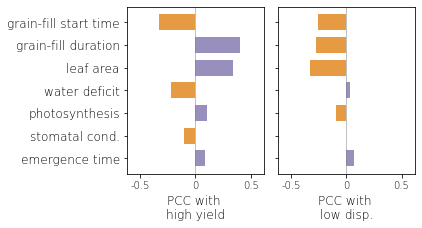

In [2]:
plot_pcc_emps('present')

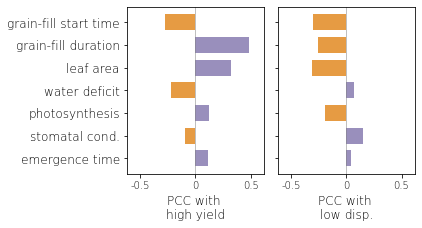

In [10]:
plot_pcc_emps('f2050')

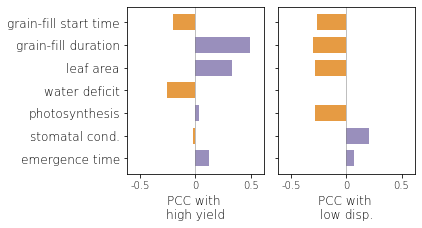

In [3]:
plot_pcc_emps('f2100')

### Alternative visualization

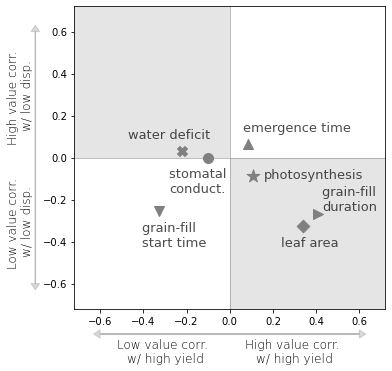

In [2]:
plot_pcc_emps_board('present')

### Alternative visualization

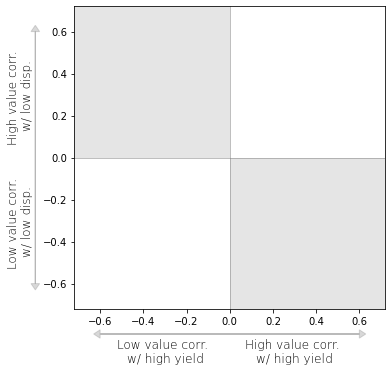

In [317]:
# visualization
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

# plot specs
plt.xlim(-0.72,0.72)
plt.ylim(-0.72,0.72)

# annotations
ax.axvline(x=0, color='grey', linewidth=0.5)
ax.axhline(y=0, color='grey', linewidth=0.5)

ax.arrow(-0.6, -0.84, 1.2, 0, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(0.6, -0.84, -1.2, 0, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(-0.9, -0.6, 0, 1.2, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(-0.9, 0.6, 0, -1.2, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)

ax.annotate('Low value corr. \nw/ high yield', (-0.3,-0.92), 
            ha='center', va='center', fontweight='light', fontsize=12,
            annotation_clip=False)
ax.annotate('High value corr. \nw/ high yield', (0.3,-0.92), 
            ha='center', va='center', fontweight='light', fontsize=12,
            annotation_clip=False)
ax.annotate('Low value corr. \nw/ low disp.', (-0.97, -0.3), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)
ax.annotate('High value corr. \nw/ low disp.', (-0.97, 0.3), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)

# antagonistic regions
rect=mpatches.Rectangle((-0.85,0),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)
rect=mpatches.Rectangle((0,-0.85),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)

fig.subplots_adjust(left=0.18, bottom=0.18)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_pcc_yield_disp_emp_blank_shading.png', format='png', dpi=800)

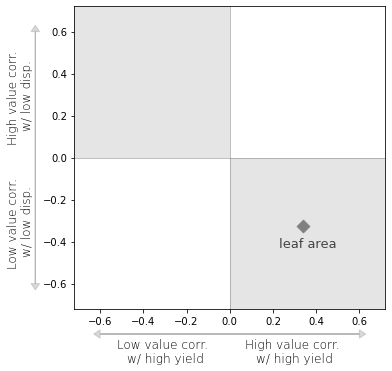

In [320]:
# visualization
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

markers = ['>', 'v', '^', '*', 'o', 'D', 'X']
sizes = [0, 0, 0, 0, 0, 80, 0]

for item in np.arange(len(rs_mean)):
    ax.scatter(rs_mean[item], rs_disp[item],
               color='grey', s=sizes[item], 
               marker=markers[item])

# annotate
emps_text = ['grain-fill \nduration', 'grain-fill \nstart time', 'emergence time', 
             'photosynthesis', 'stomatal \nconduct.', 'leaf area', 'water deficit']

x_adjust = [0.04, -0.11, 0.05, 0.06, -0.12, -0.11, -0.17]
y_adjust = [-0.05, -0.17, -0.02, -0.02, -0.16, -0.1, 0.06]
ax.annotate(emps_text[-2], (rs_mean[-2] + x_adjust[-2], 
                  rs_disp[-2] + y_adjust[-2]),
            size=13, alpha=0.7)
# plot specs
plt.xlim(-0.72,0.72)
plt.ylim(-0.72,0.72)

# annotations
ax.axvline(x=0, color='grey', linewidth=0.5)
ax.axhline(y=0, color='grey', linewidth=0.5)

ax.arrow(-0.6, -0.84, 1.2, 0, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(0.6, -0.84, -1.2, 0, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(-0.9, -0.6, 0, 1.2, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(-0.9, 0.6, 0, -1.2, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)

ax.annotate('Low value corr. \nw/ high yield', (-0.3,-0.92), 
            ha='center', va='center', fontweight='light', fontsize=12,
            annotation_clip=False)
ax.annotate('High value corr. \nw/ high yield', (0.3,-0.92), 
            ha='center', va='center', fontweight='light', fontsize=12,
            annotation_clip=False)
ax.annotate('Low value corr. \nw/ low disp.', (-0.97, -0.3), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)
ax.annotate('High value corr. \nw/ low disp.', (-0.97, 0.3), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)

# antagonistic regions
rect=mpatches.Rectangle((-0.85,0),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)
rect=mpatches.Rectangle((0,-0.85),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)

fig.subplots_adjust(left=0.18, bottom=0.18)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_pcc_yield_disp_emp_example.png', format='png', dpi=800)

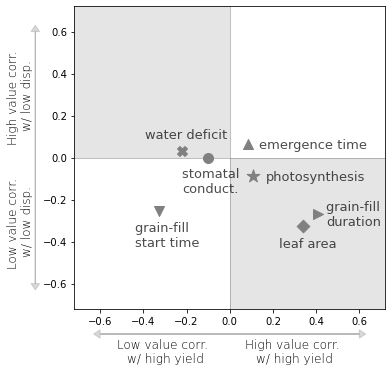

In [305]:
# visualization
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

markers = ['>', 'v', '^', '*', 'o', 'D', 'X']
sizes = [100, 100, 100, 180, 100, 80, 100]

for item in np.arange(len(rs_mean)):
    ax.scatter(rs_mean[item], rs_disp[item],
               color='grey', s=sizes[item], 
               marker=markers[item])

# annotate
emps_text = ['grain-fill \nduration', 'grain-fill \nstart time', 'emergence time', 
             'photosynthesis', 'stomatal \nconduct.', 'leaf area', 'water deficit']

x_adjust = [0.04, -0.11, 0.05, 0.06, -0.12, -0.11, -0.17]
y_adjust = [-0.05, -0.17, -0.02, -0.02, -0.16, -0.1, 0.06]
for count, emp in enumerate(emps_text):
    ax.annotate(emp, (rs_mean[count] + x_adjust[count], 
                      rs_disp[count] + y_adjust[count]),
                size=13, alpha=0.7)
# plot specs
plt.xlim(-0.72,0.72)
plt.ylim(-0.72,0.72)

# annotations
ax.axvline(x=0, color='grey', linewidth=0.5)
ax.axhline(y=0, color='grey', linewidth=0.5)

ax.arrow(-0.6, -0.84, 1.2, 0, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(0.6, -0.84, -1.2, 0, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(-0.9, -0.6, 0, 1.2, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(-0.9, 0.6, 0, -1.2, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)

ax.annotate('Low value corr. \nw/ high yield', (-0.3,-0.92), 
            ha='center', va='center', fontweight='light', fontsize=12,
            annotation_clip=False)
ax.annotate('High value corr. \nw/ high yield', (0.3,-0.92), 
            ha='center', va='center', fontweight='light', fontsize=12,
            annotation_clip=False)
ax.annotate('Low value corr. \nw/ low disp.', (-0.97, -0.3), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)
ax.annotate('High value corr. \nw/ low disp.', (-0.97, 0.3), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)

# antagonistic regions
rect=mpatches.Rectangle((-0.85,0),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)
rect=mpatches.Rectangle((0,-0.85),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)

fig.subplots_adjust(left=0.18, bottom=0.18)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_pcc_yield_disp_emp.png', format='png', dpi=800)

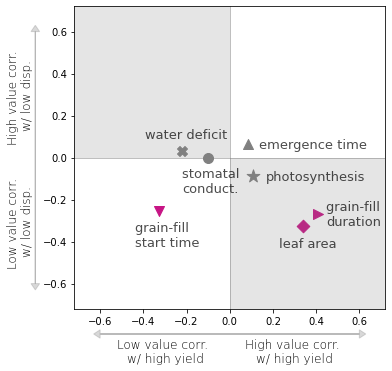

In [313]:
# visualization
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

markers = ['>', 'v', '^', '*', 'o', 'D', 'X']
sizes = [100, 100, 100, 180, 100, 80, 100]
#c1 = 'deeppink'
c1 = 'mediumvioletred'
c2 = 'grey'
colors = [c1,c1,c2,c2,c2,c1,c2]

for item in np.arange(len(rs_mean)):
    ax.scatter(rs_mean[item], rs_disp[item],
               color=colors[item], s=sizes[item], 
               marker=markers[item])

# annotate
emps_text = ['grain-fill \nduration', 'grain-fill \nstart time', 'emergence time', 
             'photosynthesis', 'stomatal \nconduct.', 'leaf area', 'water deficit']

x_adjust = [0.04, -0.11, 0.05, 0.06, -0.12, -0.11, -0.17]
y_adjust = [-0.05, -0.17, -0.02, -0.02, -0.16, -0.1, 0.06]
for count, emp in enumerate(emps_text):
    ax.annotate(emp, (rs_mean[count] + x_adjust[count], 
                      rs_disp[count] + y_adjust[count]),
                size=13, alpha=0.7)
# plot specs
plt.xlim(-0.72,0.72)
plt.ylim(-0.72,0.72)

# annotations
ax.axvline(x=0, color='grey', linewidth=0.5)
ax.axhline(y=0, color='grey', linewidth=0.5)

ax.arrow(-0.6, -0.84, 1.2, 0, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(0.6, -0.84, -1.2, 0, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(-0.9, -0.6, 0, 1.2, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(-0.9, 0.6, 0, -1.2, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)

ax.annotate('Low value corr. \nw/ high yield', (-0.3,-0.92), 
            ha='center', va='center', fontweight='light', fontsize=12,
            annotation_clip=False)
ax.annotate('High value corr. \nw/ high yield', (0.3,-0.92), 
            ha='center', va='center', fontweight='light', fontsize=12,
            annotation_clip=False)
ax.annotate('Low value corr. \nw/ low disp.', (-0.97, -0.3), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)
ax.annotate('High value corr. \nw/ low disp.', (-0.97, 0.3), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)

# antagonistic regions
rect=mpatches.Rectangle((-0.85,0),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)
rect=mpatches.Rectangle((0,-0.85),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)

fig.subplots_adjust(left=0.18, bottom=0.18)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_pcc_yield_disp_emp_highlighted.png', format='png', dpi=800)

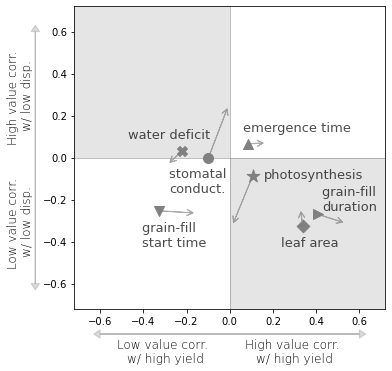

In [111]:
emps = ['jday', 'pheno_days', 'LA', 'water_deficit_mean', 'An', 'gs', 'edate']
emps_text = ['grain-fill \nstart time', 'grain-fill \nduration',  'leaf area', 
             'water deficit', 'photosynthesis', 'stomatal \nconduct.', 'emergence time']


# visualization
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

# plot specs
plt.xlim(-0.72,0.72)
plt.ylim(-0.72,0.72)

# annotations
ax.axvline(x=0, color='grey', linewidth=0.5)
ax.axhline(y=0, color='grey', linewidth=0.5)

ax.arrow(-0.6, -0.84, 1.2, 0, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(0.6, -0.84, -1.2, 0, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(-0.9, -0.6, 0, 1.2, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)
ax.arrow(-0.9, 0.6, 0, -1.2, color='grey', alpha=0.3,
         head_length=0.03, head_width=0.04, clip_on=False)

ax.annotate('Low value corr. \nw/ high yield', (-0.3,-0.92), 
            ha='center', va='center', fontweight='light', fontsize=12,
            annotation_clip=False)
ax.annotate('High value corr. \nw/ high yield', (0.3,-0.92), 
            ha='center', va='center', fontweight='light', fontsize=12,
            annotation_clip=False)
ax.annotate('Low value corr. \nw/ low disp.', (-0.97, -0.3), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)
ax.annotate('High value corr. \nw/ low disp.', (-0.97, 0.3), 
            ha='center', va='center', fontweight='light', 
            fontsize=12, rotation=90,
            annotation_clip=False)

emps = ['jday', 'pheno_days', 'LA', 'water_deficit_mean', 'An', 'gs', 'edate']
markers = ['v', '>', 'D', 'X', '*', 'o', '^']
sizes = [100, 100, 80, 100, 180, 100, 100]

c1 = 'mediumvioletred'
c2 = 'grey'
colors = [c1,c1,c2,c2,c2,c1,c2]

for item in np.arange(len(emps)):
    ax.scatter(rs_mean_present[item], rs_disp_present[item],
               c='grey', s=sizes[item], 
               marker=markers[item])

for item in np.arange(len(emps)):
    ax.arrow(rs_mean_present[item], rs_disp_present[item], 
             rs_mean_f2100[item]-rs_mean_present[item], 
             rs_disp_f2100[item]-rs_disp_present[item],
             color='grey', 
             overhang=0.8, head_length=0.03, head_width=0.03, alpha=0.6)

emps = ['jday', 'pheno_days', 'LA', 'water_deficit_mean', 'An', 'gs', 'edate']
x_adjust = [-0.08, 0.02, -0.1, -0.25, 0.05, -0.18, -0.02]
y_adjust = [-0.17, 0.02, -0.1, 0.06, -0.01, -0.16, 0.06]
for count, emp in enumerate(emps_text):
    ax.annotate(emp, (rs_mean_present[count] + x_adjust[count], 
                      rs_disp_present[count] + y_adjust[count]),
                size=13, alpha=0.7)

    
    
# antagonistic regions
rect=mpatches.Rectangle((-0.85,0),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)
rect=mpatches.Rectangle((0,-0.85),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)

fig.subplots_adjust(left=0.18, bottom=0.18)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_pcc_yield_disp_emp_blank_shading.png', format='png', dpi=800)

## PCC plots with data points across all sites

In [409]:
# grain-fill start date & duration
df_pheno_grouped = df_phenology[
    df_phenology.pheno == '"grainFill"'].groupby(
    ['cvar','site']).mean().reset_index()[['cvar','site','pheno_days', 'jday']]

# pdate
df_pheno_gdate = df_phenology[
    df_phenology.pheno == '"Germinated"'].groupby(
    ['cvar','site']).mean().reset_index()[['cvar','site','jday']]
df_pheno_gdate.columns = ['cvar','site','gdate']
df_pheno_grouped = df_pheno_grouped.merge(df_pheno_gdate, how='left', on=['cvar','site'])

# photosynthesis & gs
df_phys_grouped = df_phys[
    df_phys.pheno=='"grainFill"'].groupby(
    ['cvar','site']).mean().reset_index()[['cvar','site','An', 'gs']]

# leaf area
df_leaves_grouped = df_leaves[
    df_leaves.pheno == '"Tasselinit"'].groupby(
    ['cvar','site']).mean().reset_index()[['cvar','site','LA']]
df_leaves_grouped['mean'] = means
df_leaves_grouped['disp'] = disps

# merge all
df_pcc = df_pheno_grouped.merge(df_phys_grouped, how='left', on=['cvar','site'])
df_pcc = df_pcc.merge(df_leaves_grouped, how='left', on=['cvar', 'site'])

In [411]:
rs_mean = []
ps = []
cis_mean = []

emps = df_pcc.columns[2:8]

for item, emp in enumerate(emps):
    covars = emps.tolist()
    covars.remove(emp)
    pcc = pg.partial_corr(df_pcc, x=emp, y='mean',
                          x_covar=covars)
    rs_mean.append(pcc['r']['pearson'])
    ps.append(pcc['p-val']['pearson'])
    cis_mean.append(pcc['CI95%']['pearson'])
    
rs_disp = []
ps = []
cis_disp = []

emps = df_pcc.columns[2:8]

for item, emp in enumerate(emps):
    covars = emps.tolist()
    covars.remove(emp)
    pcc = pg.partial_corr(df_pcc, x=emp, y='disp',
                          x_covar=covars)
    rs_disp.append(pcc['r']['pearson'])
    ps.append(pcc['p-val']['pearson'])
    cis_disp.append(pcc['CI95%']['pearson'])
    
xerrs = []
for item in np.arange(len(emps)):
    xerr = round(cis_mean[item][1] - cis_mean[item][0],2)
    xerrs.append(xerr)

yerrs = []
for item in np.arange(len(emps)):
    yerr = round(cis_disp[item][1] - cis_disp[item][0],2)
    yerrs.append(yerr)

## PCC plots clustered by sites

In [9]:
df_climate = df_all.groupby('site').mean()[['temp', 'vpd', 'precip']]
df_climate_std = StandardScaler().fit_transform(df_climate)

kmeans_mod = KMeans(n_clusters=4)
kmeans_mod.fit(df_climate_std)
y_kmeans = kmeans_mod.predict(df_climate_std)

df_cluster = df_climate.copy()
df_cluster['group'] = y_kmeans

df_km0 = df_cluster.query('group==0')
df_km1 = df_cluster.query('group==1')
df_km2 = df_cluster.query('group==2')
df_km3 = df_cluster.query('group==3')

df_sites.site = df_sites.site.astype(int)
df_clustered_sites = pd.merge(df_cluster, df_sites, left_on='site', right_on='site')

In [10]:
sites = df_km3.index.tolist()
df_pcc_subsites = df_pcc[df_pcc.site.isin(sites)]

In [11]:
rs_mean = []
ps = []
cis_mean = []

emps = df_pcc_subsites.columns[2:8]

for item, emp in enumerate(emps):
    covars = emps.tolist()
    covars.remove(emp)
    pcc = pg.partial_corr(df_pcc_subsites, x=emp, y='mean',
                          x_covar=covars)
    rs_mean.append(pcc['r']['pearson'])
    ps.append(pcc['p-val']['pearson'])
    cis_mean.append(pcc['CI95%']['pearson'])
    
rs_disp = []
ps = []
cis_disp = []

for item, emp in enumerate(emps):
    covars = emps.tolist()
    covars.remove(emp)
    pcc = pg.partial_corr(df_pcc_subsites, x=emp, y='disp',
                          x_covar=covars)
    rs_disp.append(pcc['r']['pearson'])
    ps.append(pcc['p-val']['pearson'])
    cis_disp.append(pcc['CI95%']['pearson'])
    
xerrs = []
for item in np.arange(len(emps)):
    xerr = round(cis_mean[item][1] - cis_mean[item][0],2)
    xerrs.append(xerr)

yerrs = []
for item in np.arange(len(emps)):
    yerr = round(cis_disp[item][1] - cis_disp[item][0],2)
    yerrs.append(yerr)

(-0.7, 0.7)

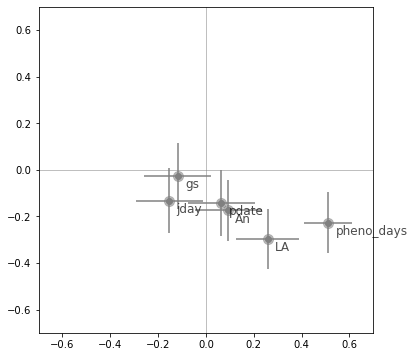

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

ax.errorbar(rs_mean, rs_disp, 
            xerr=xerrs, yerr=yerrs, fmt='o', color='grey')

ax.scatter(rs_mean, rs_disp,
            color='grey', s=100, alpha=0.5)

for count, emp in enumerate(emps):
    ax.annotate(emp, (rs_mean[count]+0.03, rs_disp[count]-0.05),
                size=12, alpha=0.7)

ax.axvline(x=0, color='grey', linewidth=0.5)
ax.axhline(y=0, color='grey', linewidth=0.5)

plt.xlim(-0.7,0.7)
plt.ylim(-0.7,0.7)

Text(0.5, 1.0, 'Clustered sites')

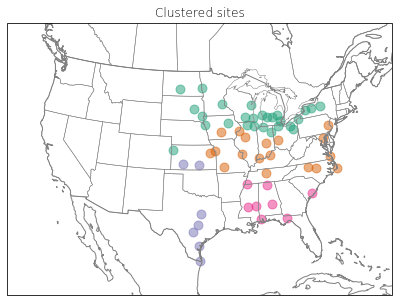

In [13]:
df_km0_sites = pd.merge(df_km0, df_sites, on='site')
df_km1_sites = pd.merge(df_km1, df_sites, on='site')
df_km2_sites = pd.merge(df_km2, df_sites, on='site')
df_km3_sites = pd.merge(df_km3, df_sites, on='site')
fig = plt.figure(figsize=(8,5))
extent = [-123, -72, 19, 53]

ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
    central_latitude=39.5, central_longitude=-98.35))
mp = ax.scatter(df_km0_sites.lon, df_km0_sites.lat, 
                color=Dark2_4.mpl_colors[2], # purple
                s=80, alpha=0.5, transform=ccrs.PlateCarree())
mp = ax.scatter(df_km1_sites.lon, df_km1_sites.lat, 
                color=Dark2_4.mpl_colors[1], # orange
                s=80, alpha=0.5, transform=ccrs.PlateCarree())
mp = ax.scatter(df_km2_sites.lon, df_km2_sites.lat, 
                color=Dark2_4.mpl_colors[0], # green
                s=80, alpha=0.5, transform=ccrs.PlateCarree())
mp = ax.scatter(df_km3_sites.lon, df_km3_sites.lat, 
                color=Dark2_4.mpl_colors[3], # pink
                s=80, alpha=0.5, transform=ccrs.PlateCarree())

ax.set_extent(extent)
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
ax.set_title('Clustered sites', fontweight='light', size=12)

#fig.colorbar(mp, shrink=0.5)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/map_clustered_sites.png', format='png', dpi=800)

### Partial Correlation Coefficient

In [142]:
# fetch yield mean & disp
run_name = 'present'

# Read in data etc.
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    f'/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_{run_name}.yml')
df_extended, df_stuck = parse_mature(df_all)
df_all.drop(df_stuck.index, inplace=True)

df = df_all
groups = ['cvar', 'site']
sim = 'dm_ear'

mx_mean = agg_sims(df, groups, 'mean', sim)
mx_variance = agg_sims(df, groups, 'variance', sim)
mx_disp = np.divide(mx_variance, mx_mean)

means = mx_mean.flatten()
disps = np.array(mx_disp*-1).flatten()

means = mx_mean.mean(axis=1)
disps = mx_disp.mean(axis=1)*-1
means = np.delete(means, 6) 
disps = np.delete(disps, 6) 

df_pcc = df_emps_present.copy()
df_pcc['mean'] = means
df_pcc['disp'] = disps

df_pcc = df_pcc.merge(df_params, on='cvar')

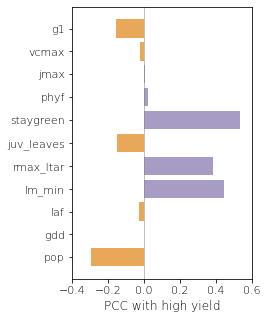

In [143]:
params_list = list(df_params.columns[:-1])
rs_mean = []
ps = []
cis = []

for item in np.arange(11):
    param = params_list[item]
    select = list(np.arange(11))
    select.remove(item)
    params_sub = [params_list[item] for item in select]
    pcc = pg.partial_corr(df_pcc, x=param, y='mean',
                          x_covar=params_sub)
    rs_mean.append(pcc['r']['pearson'])
    ps.append(pcc['p-val']['pearson'])
    cis.append(pcc['CI95%']['pearson'])

# set error bars
errs_mean = [np.round(np.abs(cis[item][0] - cis[item][1]),2) for item in np.arange(len(cis))]

# set bar colors
cc = ['colors']*len(rs_mean)
for n, r in enumerate(rs_mean):
    if r < 0:
        cc[n] = '#e08214'
    if r > 0:
        cc[n] = '#8073ac'

# visualization
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.barh(list(reversed(params_list)), 
        list(reversed(rs_mean)), 
        color=list(reversed(cc)),
        xerr=errs_mean, ecolor='none', alpha=0.7)
ax.set_xlabel('PCC with high yield', size=12, fontweight='light')
ax.set_xlim(-0.4, 0.6)

plt.axvline(x=0, color='grey', linewidth=0.5)
plt.xticks(fontsize=11, weight='light')
plt.yticks(fontsize=11, weight='light')
fig.subplots_adjust(left=0.3, right=0.8)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/pcc_mean.png', format='png', dpi=800)

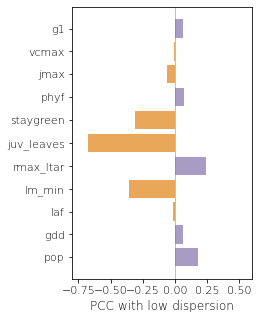

In [147]:
params_list = list(df_params.columns[:-1])
rs_disp = []
ps = []
cis = []

for item in np.arange(11):
    param = params_list[item]
    select = list(np.arange(11))
    select.remove(item)
    params_sub = [params_list[item] for item in select]
    pcc = pg.partial_corr(df_pcc, x=param, y='disp',
                          x_covar=params_sub)
    rs_disp.append(pcc['r']['pearson'])
    ps.append(pcc['p-val']['pearson'])
    cis.append(pcc['CI95%']['pearson'])

# set error bars
errs_disp = [np.round(np.abs(cis[item][0] - cis[item][1]),2) for item in np.arange(len(cis))]

# set bar colors
cc = ['colors']*len(rs_disp)
for n, r in enumerate(rs_disp):
    if r > 0:
        cc[n] = '#8073ac'
    if r < 0:
        cc[n] = '#e08214'

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.barh(list(reversed(params_list)), 
        list(reversed(rs_disp)), 
        color=list(reversed(cc)),
        xerr=errs_disp, ecolor='none', alpha=0.7)
ax.set_xlim(-0.8, 0.6)
ax.set_xlabel('PCC with low dispersion', size=12, fontweight='light')

plt.axvline(x=0, color='grey', linewidth=0.5)
plt.xticks(fontsize=11, weight='light')
plt.yticks(fontsize=11, weight='light')
fig.subplots_adjust(left=0.3, right=0.8)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/pcc_disp.png', format='png', dpi=800)

Text(0, 0.5, 'PCC with low dispersion')

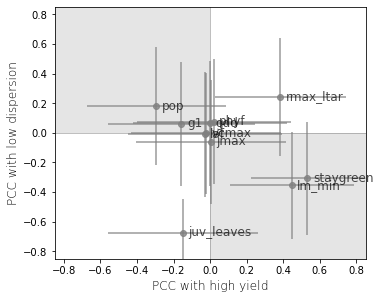

In [150]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1)

# antagonistic regions
rect=mpatches.Rectangle((-0.85,0),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)
rect=mpatches.Rectangle((0,-0.85),0.85, 0.85, 
                        facecolor='grey', alpha=0.2)
plt.gca().add_patch(rect)

fig.subplots_adjust(left=0.18, bottom=0.18)


# scatter points
ax.errorbar(rs_mean, rs_disp, 
            xerr=errs_mean, yerr=errs_disp, 
            fmt='o', color='grey', alpha=0.8)
#ax.scatter(rs_mean, rs_disp,
#            color='grey', s=80)


#ax.scatter(rs_mean, rs_disp, s=150, color='grey', alpha=0.8)
ax.axvline(x=0, color='grey', linewidth=0.5)
ax.axhline(y=0, color='grey', linewidth=0.5)
for count, item in enumerate(params_list):
    ax.annotate(item, (rs_mean[count]+0.03, rs_disp[count]-0.02),
                size=12, alpha=0.7)
ax.set_xlim(-0.85,0.85)
ax.set_ylim(-0.85,0.85)
ax.set_xlabel('PCC with high yield', fontweight='light', size=12)
ax.set_ylabel('PCC with low dispersion', fontweight='light', size=12)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/scatter_pcc_yield_disp.png', format='png', dpi=800)

In [151]:
run_name = 'f2100'

# Read in data etc.
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    f'/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_{run_name}.yml')
df_extended, df_stuck = parse_mature(df_all)
df_all.drop(df_stuck.index, inplace=True)

df = df_all.copy()
groups = ['cvar', 'site']
sim = 'dm_ear'

mx_mean = agg_sims(df, groups, 'mean', sim)
mx_variance = agg_sims(df, groups, 'variance', sim)
mx_disp = np.divide(mx_variance, mx_mean)

means = mx_mean.flatten()
disps = np.array(mx_disp*-1).flatten()

means = mx_mean.mean(axis=1)
disps = mx_disp.mean(axis=1)*-1
means = np.delete(means, 6) 
disps = np.delete(disps, 6) 

df_pcc = df_emps_f2100.copy()
df_pcc['mean'] = means
df_pcc['disp'] = disps

df_pcc = df_pcc.merge(df_params, on='cvar')

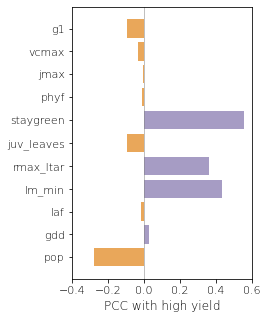

In [153]:
params_list = list(df_params.columns[:-1])
rs_mean = []
ps = []
cis = []

for item in np.arange(11):
    param = params_list[item]
    select = list(np.arange(11))
    select.remove(item)
    params_sub = [params_list[item] for item in select]
    pcc = pg.partial_corr(df_pcc, x=param, y='mean',
                          x_covar=params_sub)
    rs_mean.append(pcc['r']['pearson'])
    ps.append(pcc['p-val']['pearson'])
    cis.append(pcc['CI95%']['pearson'])

# set error bars
errs_mean = [np.round(np.abs(cis[item][0] - cis[item][1]),2) for item in np.arange(len(cis))]

# set bar colors
cc = ['colors']*len(rs_mean)
for n, r in enumerate(rs_mean):
    if r < 0:
        cc[n] = '#e08214'
    if r > 0:
        cc[n] = '#8073ac'

# visualization
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.barh(list(reversed(params_list)), 
        list(reversed(rs_mean)), 
        color=list(reversed(cc)),
        xerr=errs_mean, ecolor='none', alpha=0.7)
ax.set_xlabel('PCC with high yield', size=12, fontweight='light')
ax.set_xlim(-0.4, 0.6)

plt.axvline(x=0, color='grey', linewidth=0.5)
plt.xticks(fontsize=11, weight='light')
plt.yticks(fontsize=11, weight='light')
fig.subplots_adjust(left=0.3, right=0.8)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/pcc_mean.png', format='png', dpi=800)

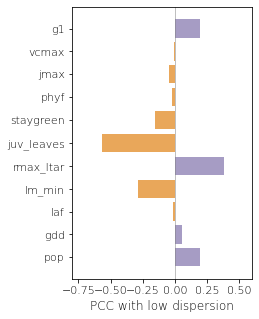

In [155]:
params_list = list(df_params.columns[:-1])
rs_disp = []
ps = []
cis = []

for item in np.arange(11):
    param = params_list[item]
    select = list(np.arange(11))
    select.remove(item)
    params_sub = [params_list[item] for item in select]
    pcc = pg.partial_corr(df_pcc, x=param, y='disp',
                          x_covar=params_sub)
    rs_disp.append(pcc['r']['pearson'])
    ps.append(pcc['p-val']['pearson'])
    cis.append(pcc['CI95%']['pearson'])

# set error bars
errs_disp = [np.round(np.abs(cis[item][0] - cis[item][1]),2) for item in np.arange(len(cis))]

# set bar colors
cc = ['colors']*len(rs_disp)
for n, r in enumerate(rs_disp):
    if r > 0:
        cc[n] = '#8073ac'
    if r < 0:
        cc[n] = '#e08214'

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.barh(list(reversed(params_list)), 
        list(reversed(rs_disp)), 
        color=list(reversed(cc)),
        xerr=errs_disp, ecolor='none', alpha=0.7)
ax.set_xlim(-0.8, 0.6)
ax.set_xlabel('PCC with low dispersion', size=12, fontweight='light')

plt.axvline(x=0, color='grey', linewidth=0.5)
plt.xticks(fontsize=11, weight='light')
plt.yticks(fontsize=11, weight='light')
fig.subplots_adjust(left=0.3, right=0.8)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/pcc_disp.png', format='png', dpi=800)